[INFO] Data loaded successfully from: Household energy bill data.csv
[INFO] Missing values filled with column medians.
[INFO] Removed 0 duplicate rows.
[INFO] Histograms saved to graphs\histograms.png
[INFO] Heatmap saved to graphs\heatmap.png
[INFO] Data split into train and test sets.
Train shape: (800, 9), Test shape: (200, 9)
[INFO] SVM model trained successfully.
[INFO] Evaluation Results:
MSE: 34522.48, R²: -0.00
[INFO] Model saved to models/svm_model.pkl
First 5 rows:
    num_rooms  num_people  housearea  is_ac  is_tv  is_flat  \
0          3           3     742.57      1      1        1   
1          1           5     952.99      0      1        0   
2          3           1     761.44      1      1        1   
3          0           5     861.32      1      1        0   
4          1           8     731.61      0      1        0   

   ave_monthly_income  num_children  is_urban  amount_paid  
0             9675.93             2         0   560.481447  
1            35064.79   

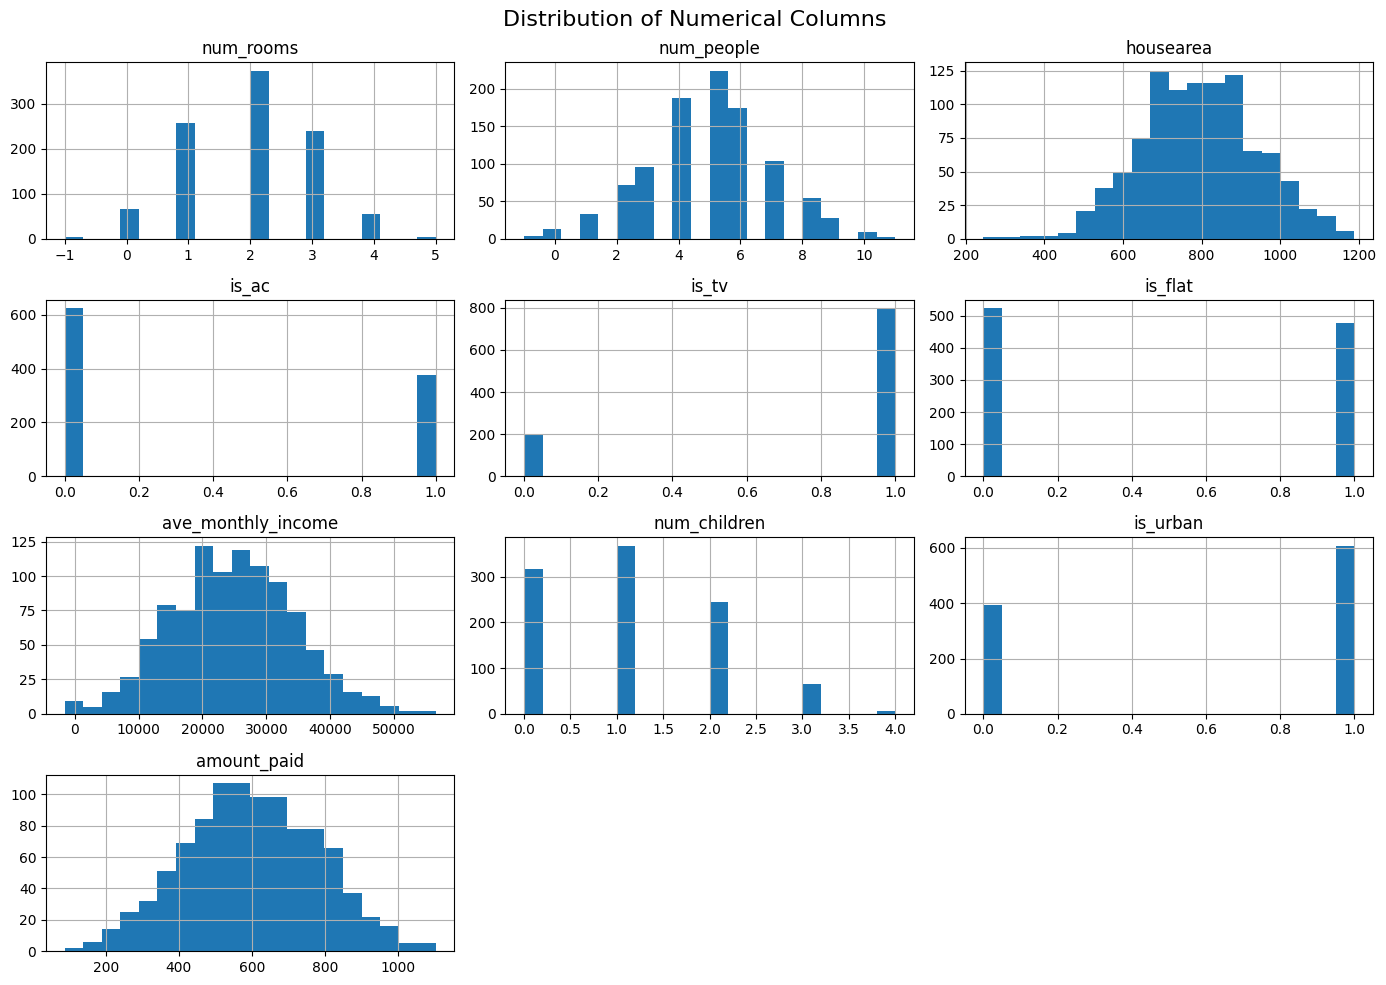

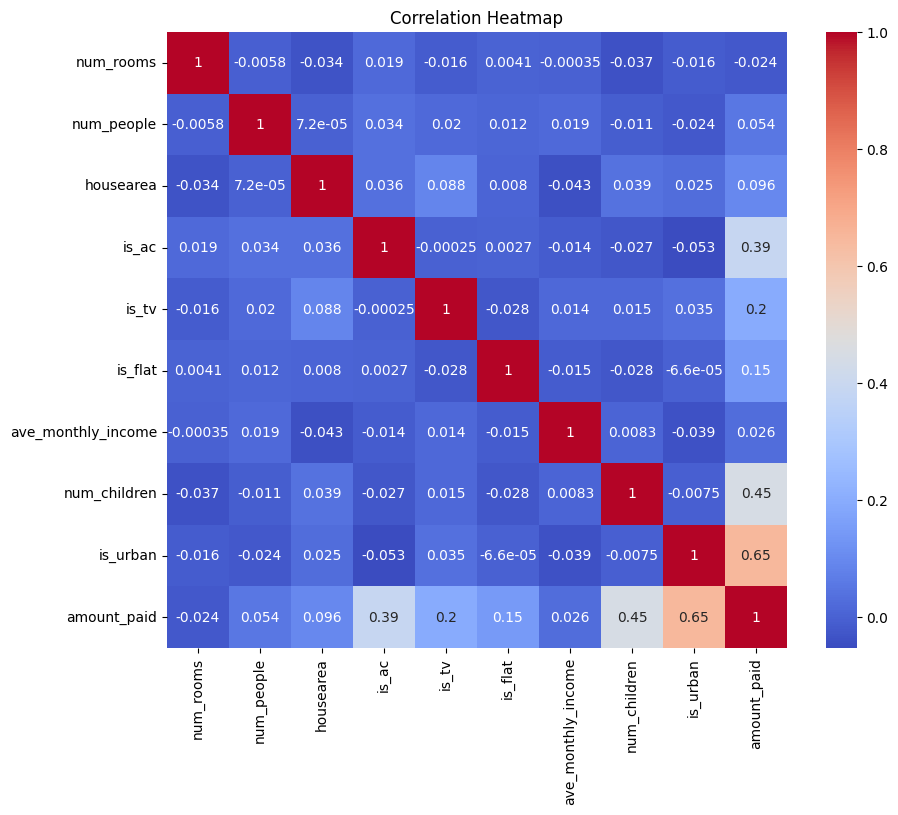

In [2]:
# 📦 Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Step 2: Import your custom class
from src.data_loader import DataLoader
from src.preprocessing import DataPreprocessor
from src.data_analyzer import DataAnalyzer
from src.data_splitter import DataSplitter
from src.svm_model import SVMModel





# 🚀 Step 3: Load the data using the DataLoader class
file_path = "Household energy bill data.csv"
loader = DataLoader(file_path)
df = loader.load_data()
preprocessor = DataPreprocessor(df)
df = preprocessor.preprocess()
analyzer = DataAnalyzer(df)
analyzer.run_all()
splitter = DataSplitter(df, target_column="amount_paid")
X_train, X_test, y_train, y_test = splitter.split()

svm = SVMModel()
svm.train(X_train, y_train)

# 📈 Evaluate
predictions = svm.evaluate(X_test, y_test)

# 💾 Save model
svm.save_model("models/svm_model.pkl")

# 🔍 Step 4: Basic understanding
print("First 5 rows:\n", df.head())
print("\nDataset Shape:", df.shape)
print("\nColumn Info:")
df.info()
print("\nSummary Statistics:\n", df.describe())

# ❓ Step 5: Check for nulls & duplicates
print("\nNull Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())

# 🧭 Step 6: Basic EDA
# Histograms for numerical columns
df.hist(bins=20, figsize=(14, 10))
plt.suptitle("Distribution of Numerical Columns", fontsize=16)
plt.tight_layout()
plt.show()

# Heatmap to show correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
